# Experimentos com pêndulos

In [1]:
using Base64
using StatsBase
using CSV
using DataFrames

In [2]:
using Images
using ImageDraw
using VideoIO

In [3]:
using Plots

In [4]:
using Optim

In [5]:
using DifferentialEquations.OrdinaryDiffEq
using DifferentialEquations.RecursiveArrayTools

In [6]:
include("../../../_assets/attachments/scripts/DisplayMovie.jl")
include("../../../_assets/attachments/scripts/VideoTracking.jl")

Main.VideoTracking

## Filmando um pêndulo caseiro

![pendulo](../../../_assets/attachments/img/pendulo_70cm_1_reduzido_curto.mp4)

<video src="../../../_assets/attachments/img/pendulo_70cm_1_reduzido_curto.mp4" controls="controls" style="max-width: 730px;">
</video>

In [7]:
html"""<video src="../../../_assets/attachments/img/pendulo_70cm_1_reduzido_curto.mp4" controls="controls" style="max-width: 730px;">
</video>"""

HTML{String}("<video src=\"../../../_assets/attachments/img/pendulo_70cm_1_reduzido_curto.mp4\" controls=\"controls\" style=\"max-width: 730px;\">\n</video>")

150-element Vector{PermutedDimsArray{RGB{N0f8}, 2, (2, 1), (2, 1), Matrix{RGB{N0f8}}}}:
 [RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); … ; RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.576,0.533,0.494) RGB{N0f8}(0.58,0.537,0.498); RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.584,0.541,0.502) RGB{N0f8}(0.584,0.541,0.502)]
 [RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); … ; RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.576,0.533,0.494) RGB{N0f8}(0.58,0.537,0.498); RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.584,0.541,0.502) RGB{N0f8}(0.584,0.541,0.502)]
 [RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); … ; RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.576,0.533,0.494) RGB{N0f8}(0.58,0.537,0.498); RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.584,0.541,0.502) RGB{N0f8}(0.584,0.541,0.502)]
 [RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); … ; RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.576,0.533,0.494) RGB{N0f8}(0.58,0.537,0.498); RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.584,0.541,0.502) RGB{N0f8}(0.584,0.541,0.502)]
 [RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); … ; RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.576,0.533,0.494) RGB{N0f8}(0.58,0.537,0.498); RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.584,0.541,0.502) RGB{N0f8}(0.584,0.541,0.502)]
 [RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.114,0.114,0.106) RGB{N0f8}(0.114,0.114,0.106); … ; RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.576,0.533,0.494) RGB{N0f8}(0.58,0.537,0.498); RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.58,0.537,0.498) RGB{N0f8}(0.58,0.537,0.498)]
 [RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.11,0.11,0.102) RGB{N0f8}(0.11,0.11,0.102); RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.11,0.11,0.102) RGB{N0f8}(0.11,0.11,0.102); … ; RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.576,0.533,0.494) RGB{N0f8}(0.576,0.533,0.494); RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.576,0.533,0.494) RGB{N0f8}(0.576,0.533,0.494)]
 [RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.11,0.11,0.102) RGB{N0f8}(0.11,0.11,0.102); RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.11,0.11,0.102) RGB{N0f8}(0.11,0.11,0.102); … ; RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.573,0.529,0.49) RGB{N0f8}(0.576,0.533,0.494); RGB{N0f8}(0.302,0.263,0.239) RGB{N0f8}(0.302,0.263,0.239) … RGB{N0f8}(0.576,0.533,0.494) RGB{N0f8}(0.576,0.533,0.494)]
 [RGB{N0f8}(0.227,0.184,0.184) RGB{N0f8}(0.227,0.184,0.184) … RGB{N0f8}(0.11,0.11
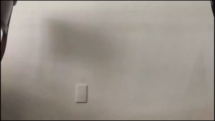
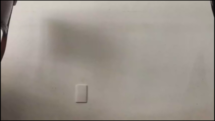
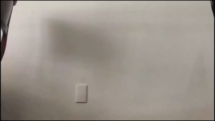
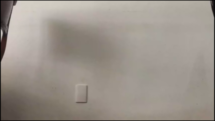
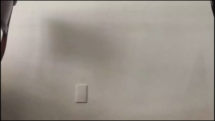
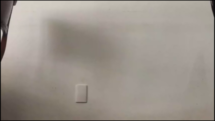
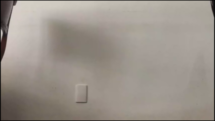
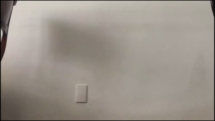
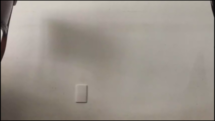
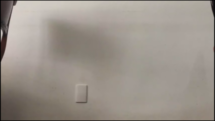
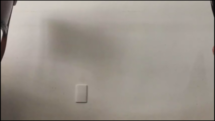
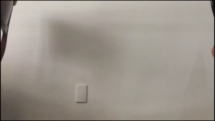
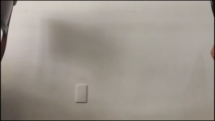
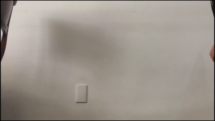
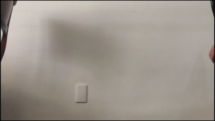
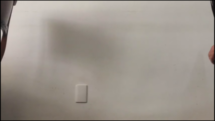
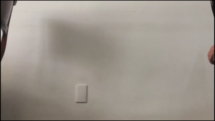
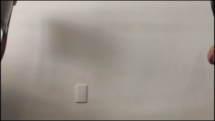
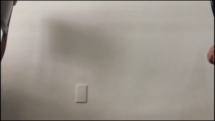
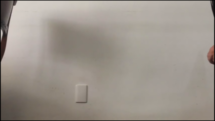
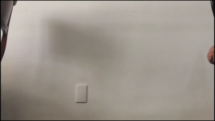
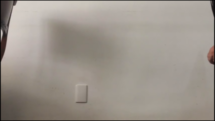
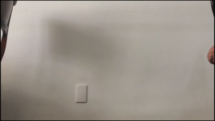
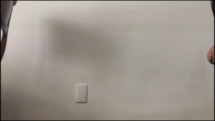
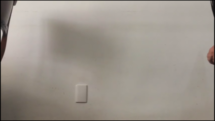
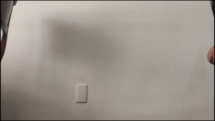
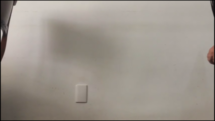
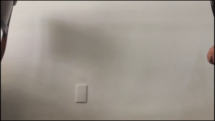
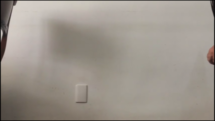
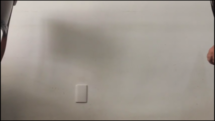
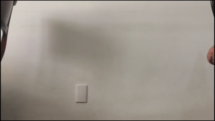
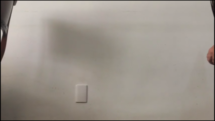
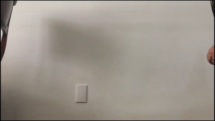
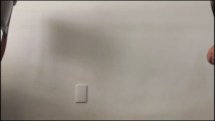
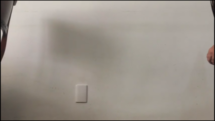
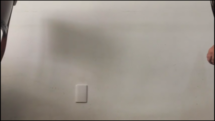
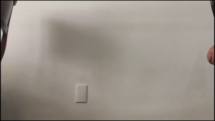
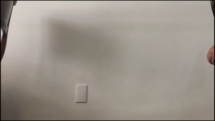
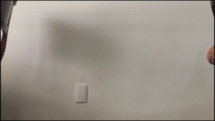
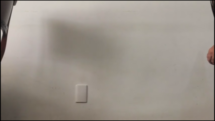
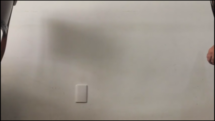
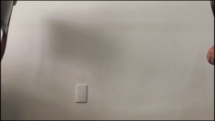
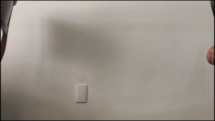
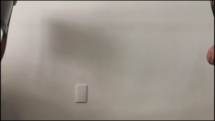
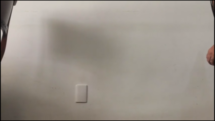
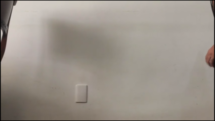
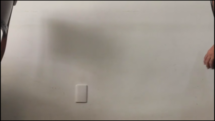
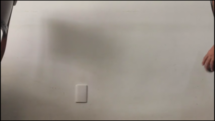
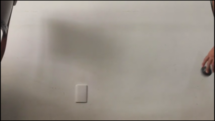
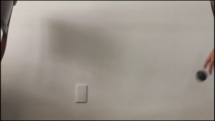
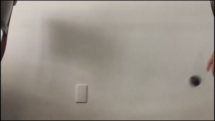
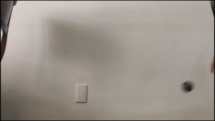
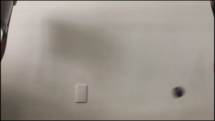
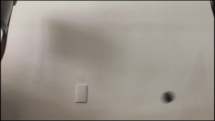
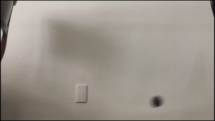
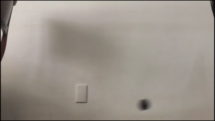
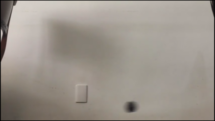
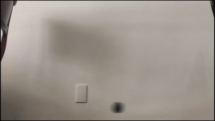
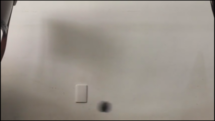
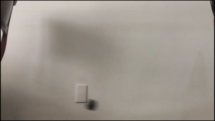
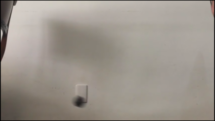
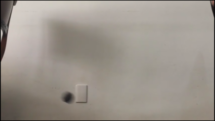
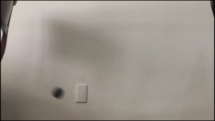
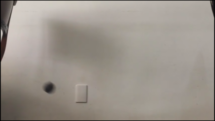
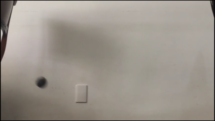
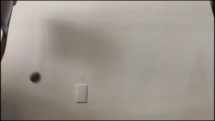
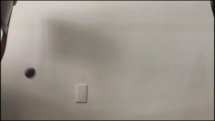
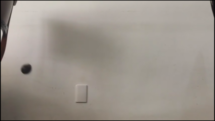
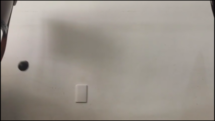
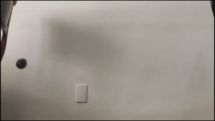
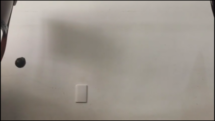
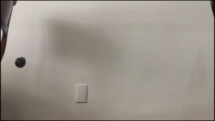
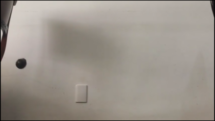
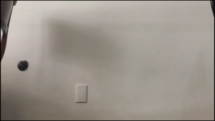
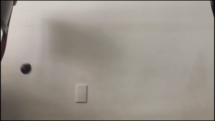
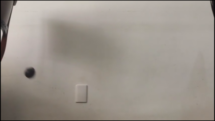
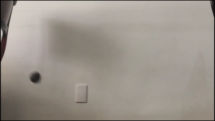
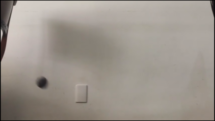
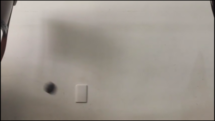
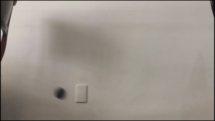
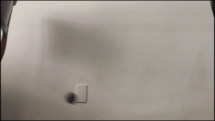
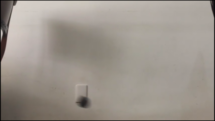
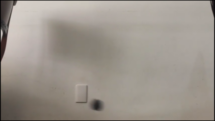
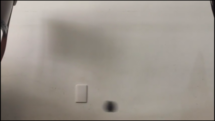
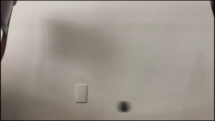
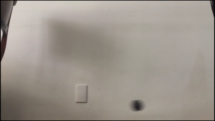
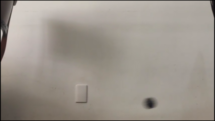
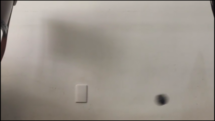
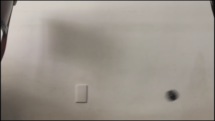
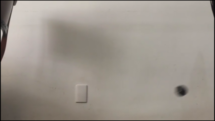
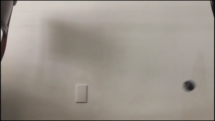
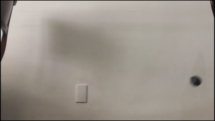
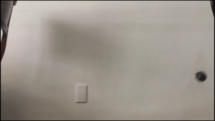
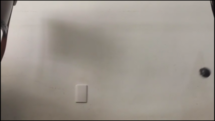
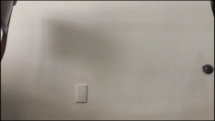
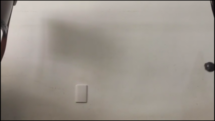
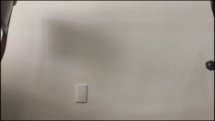
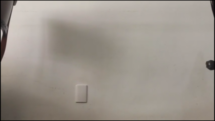
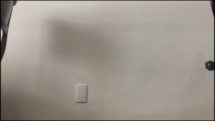
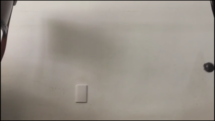
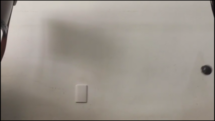
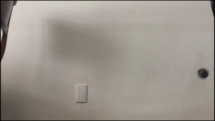
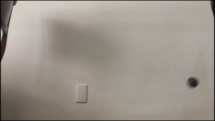
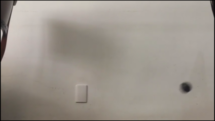
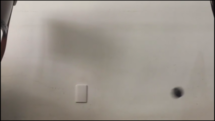
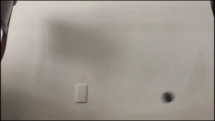
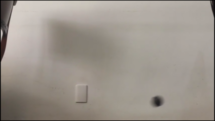
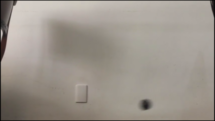
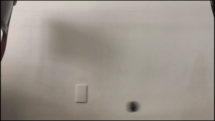
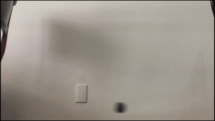
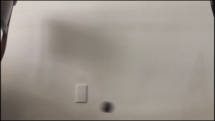
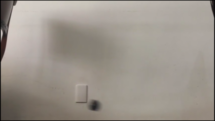
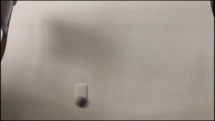
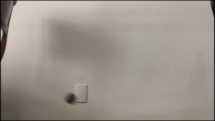
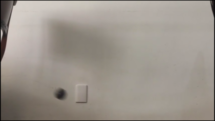
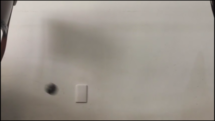
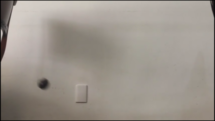
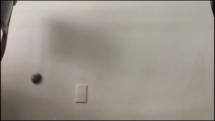
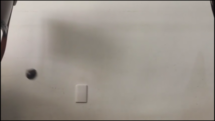
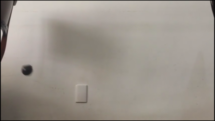
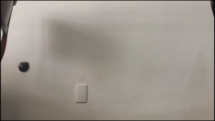
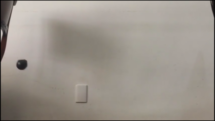
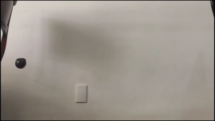
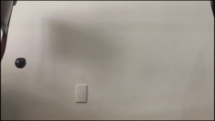
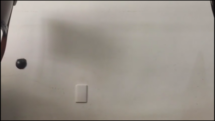
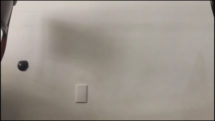
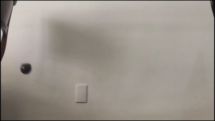
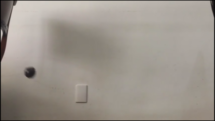
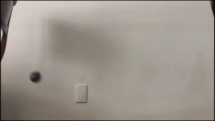
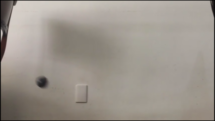
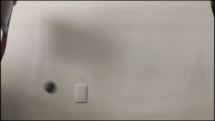
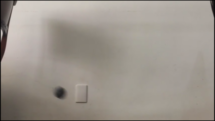
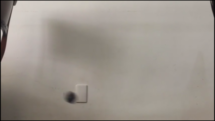
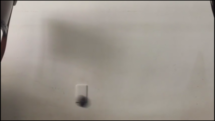
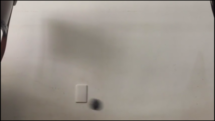
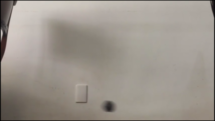
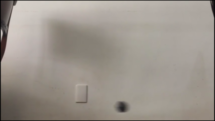
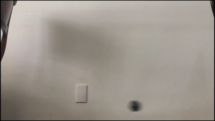
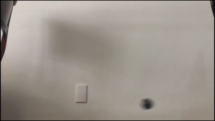
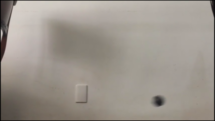
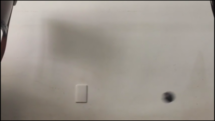
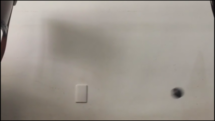
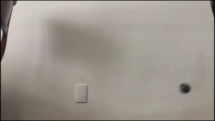
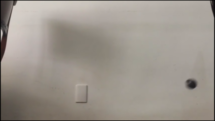
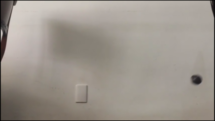
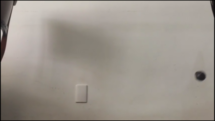
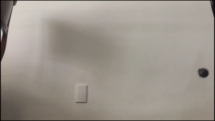
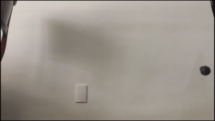
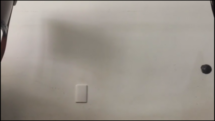

In [8]:
filename = "../../../_assets/attachments/img/pendulo_70cm_1_reduzido_curto.mp4"
vd = VideoIO.load(filename)

In [9]:
typeof(copy(vd[1]))

Matrix{RGB{N0f8}} (alias for Array{RGB{Normed{UInt8, 8}}, 2})

In [10]:
println("Duração do vídeo: $(VideoIO.get_duration(filename)) s")
println("Número de quadros: $(length(vd))")
println("Número médio de quadros por segundo: $(length(vd)/VideoIO.get_duration(filename))")

Duração do vídeo: 5.086 s
Número de quadros: 150
Número médio de quadros por segundo: 29.49272512780181


In [11]:
# video completo
filename_completo = "../../../_assets/attachments/img/pendulo_70cm_1_reduzido.mov"
vd_completo = VideoIO.load(filename_completo)
println("""Duração do vídeo: $(VideoIO.get_duration(filename_completo)) s""")
println("Número de quadros: $(length(vd_completo))")
println("""Número médio de quadros por segundo: $(length(vd_completo)/VideoIO.get_duration(filename_completo))""")


Duração do vídeo: 16.45 s
Número de quadros: 493
Número médio de quadros por segundo: 29.969604863221885


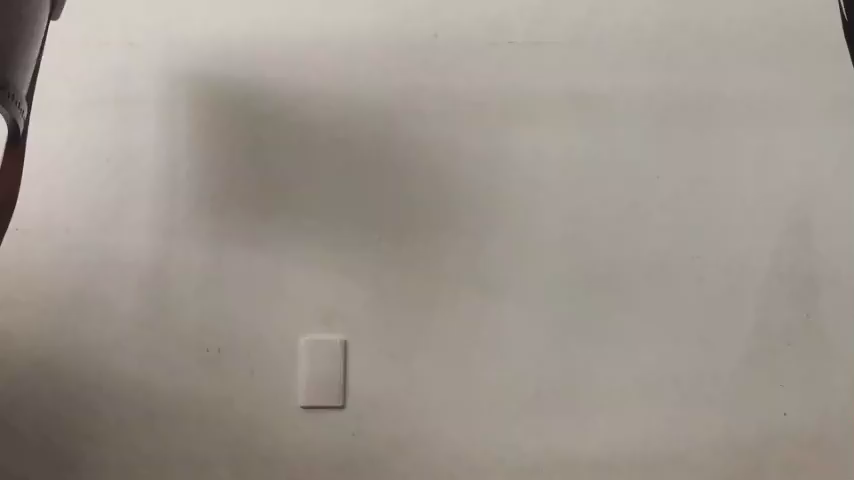

In [12]:
vd[1]

In [13]:
DisplayMovie.display_movie("../../../_assets/attachments/img/pendulo_70cm_1_reduzido_curto.mp4", embed=false)

Sorry, your browser doesn't support embedded videos.

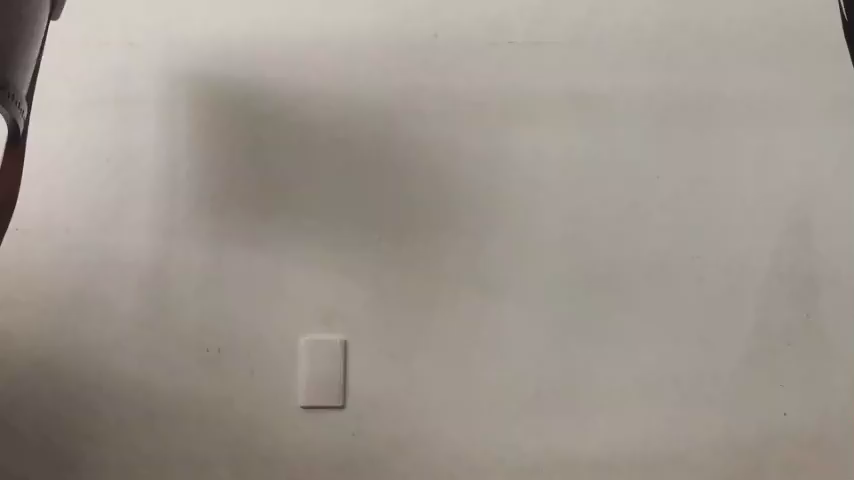

In [14]:
background = convert.(RGB{Float16}, vd[1])

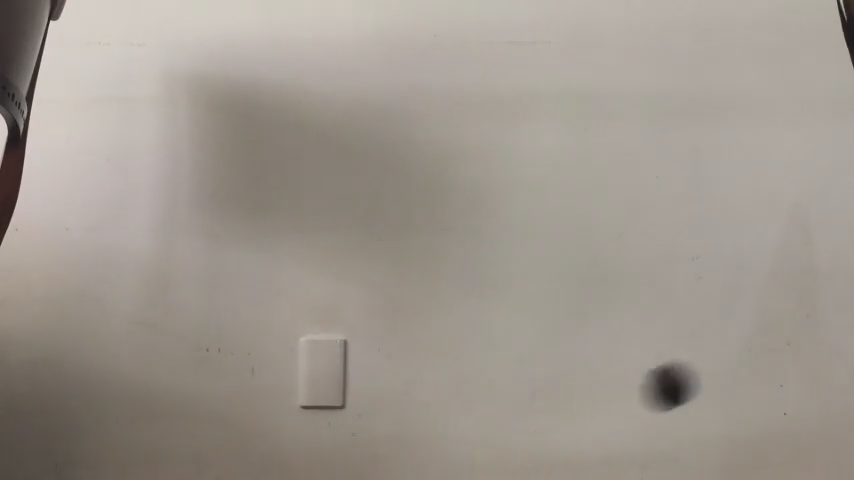

In [15]:
convert.(RGB{Float16}, vd[54])

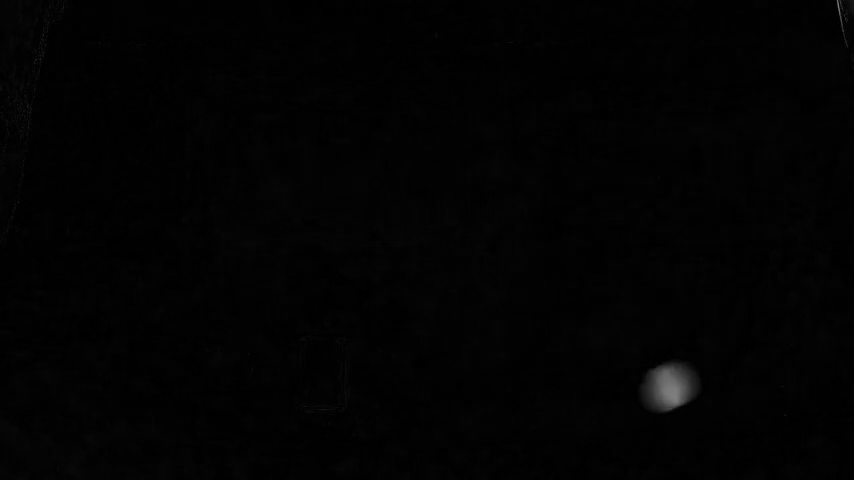

In [16]:
convert.(Gray{Float16}, abs.(convert.(RGB{Float16}, vd[54]) - background))

In [17]:
threshold = 0.1
mask = convert.(
    Gray{Float16},
    abs.(
        convert.(RGB{Float16}, vd[54]) - 
        background
    )
) .> threshold

480×854 BitMatrix:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  1  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0 

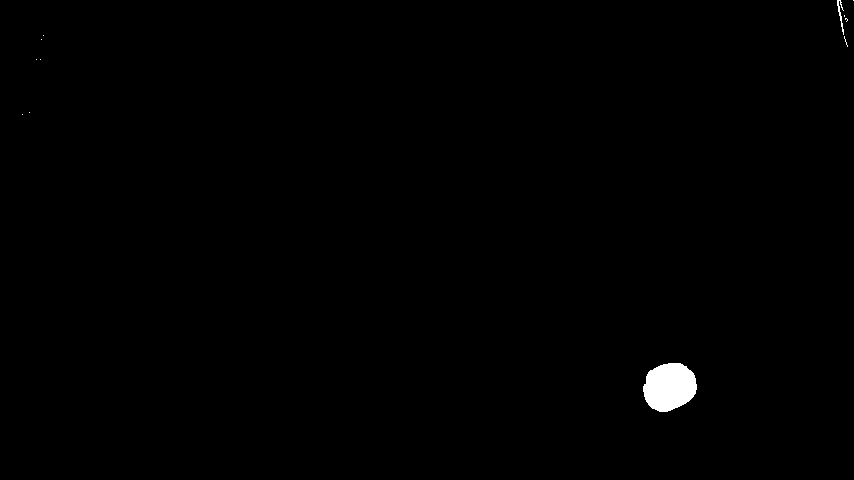

In [18]:
convert.(Gray{Float16}, mask)

In [19]:
labeled_components = label_components(mask)

480×854 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  18
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     8  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     8  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     8  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0  …  0  9  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0

In [20]:
@which label_components(mask)

label_components(A::AbstractArray; bkg, dims) in ImageMorphology at /Users/rmsrosa/.julia/packages/ImageMorphology/1lEjs/src/connected.jl:51

In [21]:
show(Docs.doc(label_components))

```
label = label_components(A; bkg = zero(eltype(A)), dims=coords_spatial(A))
label = label_components(A, connectivity; bkg = zero(eltype(A)))
```

Find the connected components in an array `A`. Components are defined as connected voxels that all have the same value distinct from `bkg`, which corresponds to the "background" component.

Specify connectivity in one of three ways:

  * A list indicating which dimensions are used to determine connectivity. For example, `dims = (1,3)` would not test neighbors along dimension 2 for connectivity. This corresponds to just the nearest neighbors, i.e., default 4-connectivity in 2d and 6-connectivity in 3d.
  * An iterable `connectivity` object with `CartesianIndex` elements encoding the displacement of each checked neighbor.
  * A symmetric boolean array of the same dimensionality as `A`, of size 1 or 3 along each dimension. Each entry in the array determines whether a given neighbor is used for connectivity analyses. For example, in two dimens

In [22]:
colorset = distinguishable_colors(maximum(labeled_components)+1, colorant"black", dropseed = false)


In [23]:
labeled_components

480×854 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  18
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     8  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     8  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     8  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0  …  0  9  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0   0
 0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0

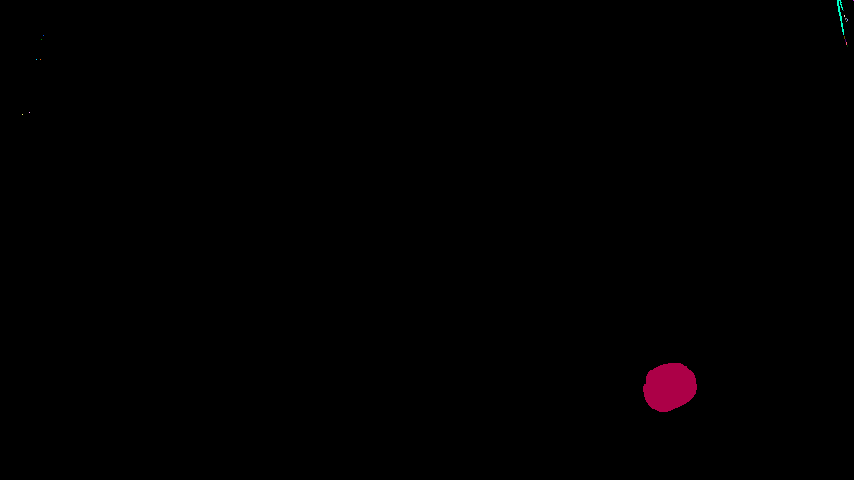

In [24]:
coloredmask = map( n -> colorset[n+1], labeled_components)

In [25]:
maximum(labeled_components)

18

In [26]:
components_location = VideoTracking.locate_components(labeled_components)
min_area = 1
filter!(p -> p.area ≥ min_area, components_location)
length(components_location)

18

In [27]:
components_location = VideoTracking.locate_components(labeled_components)
min_area = 10
filter!(p -> p.area ≥ min_area, components_location)
length(components_location)

2

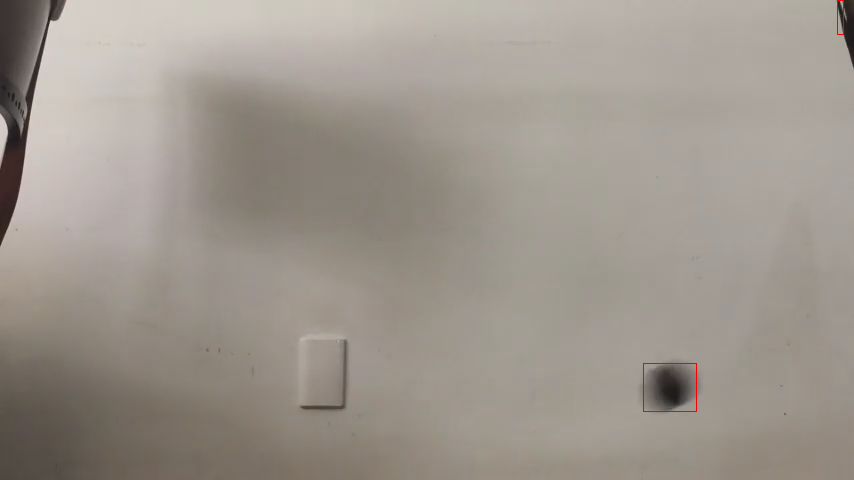

In [28]:
vd54 = copy(vd[54])
for p in components_location
    draw!(vd54, Polygon(VideoTracking.RectanglePoints(p)), colorant"red")
end
vd54

In [29]:
components_location = VideoTracking.locate_components(labeled_components)
min_area = 100
filter!(p -> p.area ≥ min_area, components_location)

1-element Vector{Main.VideoTracking.Blob}:
 (xspan, yspan) = (644:697, 364:412)

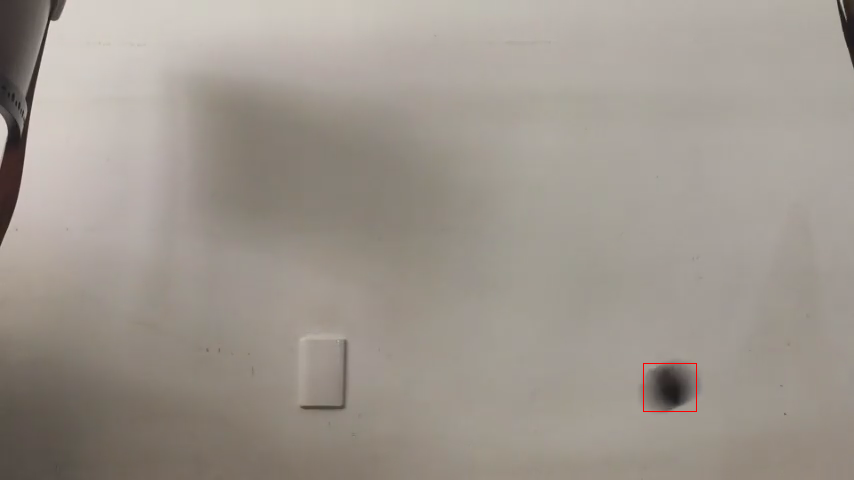

In [30]:
vd54 = copy(vd[54])
for p in components_location
    draw!(vd54, Polygon(VideoTracking.RectanglePoints(p)), colorant"red")
end
vd54

In [31]:
components_location = VideoTracking.locate_components(labeled_components)
min_area = 200
filter!(p -> p.area ≥ min_area, components_location)

1-element Vector{Main.VideoTracking.Blob}:
 (xspan, yspan) = (644:697, 364:412)

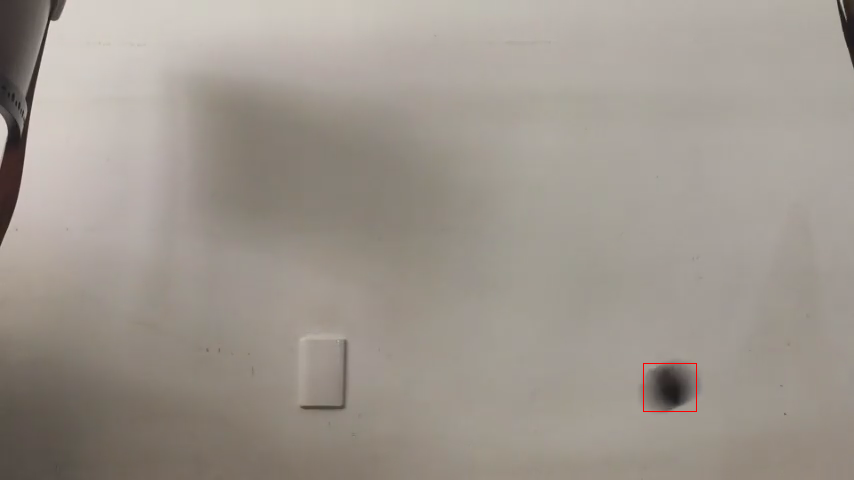

In [32]:
p = components_location[1]
draw(vd[54], Polygon(VideoTracking.RectanglePoints(p)), colorant"red")

In [33]:
filename = "../../../_assets/attachments/img/pendulo_70cm_1_reduzido_curto.mp4"
# filename = "../../../_assets/attachments/img/pendulo_70cm_1_reduzido.mov"
tracks_70cm1 = VideoTracking.find_tracks(filename, lag = 10)


Processing 150 frames ... 100%|██████████████████████████| Time: 0:00:06


3-element Vector{Main.VideoTracking.Track}:
 Tracked blob with framespan nspan = 13:150

 Tracked blob with framespan nspan = 82:150

 Tracked blob with framespan nspan = 114:150


In [34]:
VideoTracking.tracks_on_video(filename, tracks_70cm1)

┌ Info: Video saved with 150 frames and 3 tracks
└ @ Main.VideoTracking /Users/rmsrosa/Documents/git-repositories/modelagem_matematica/_assets/attachments/scripts/VideoTracking.jl:160


In [35]:
DisplayMovie.display_movie("../../../_assets/attachments/img/pendulo_70cm_1_reduzido_curto_tracked.mp4")

Sorry, your browser doesn't support embedded videos.

<video src="../../../_assets/attachments/img/pendulo_70cm_1_reduzido_curto_tracked.mp4" controls="controls" style="max-width: 730px;">
</video>

In [87]:
isfile("../../../_assets/attachments/img/pendulo_70cm_1_reduzido_curto_tracked.mp4")

true

![pendulo_tracked](../../../_assets/attachments/img/pendulo_70cm_1_reduzido_curto_tracked.mp4)

In [37]:
tracks_70cm1

3-element Vector{Main.VideoTracking.Track}:
 Tracked blob with framespan nspan = 13:150

 Tracked blob with framespan nspan = 82:150

 Tracked blob with framespan nspan = 114:150


In [38]:
tracks_70cm1[1].nspan

13:150

In [39]:
tracks_70cm1[1].path

138-element Vector{Main.VideoTracking.Blob}:
 (xspan, yspan) = (840:854, 177:240)
 (xspan, yspan) = (837:854, 183:247)
 (xspan, yspan) = (834:854, 183:253)
 (xspan, yspan) = (831:854, 183:256)
 (xspan, yspan) = (829:854, 179:257)
 (xspan, yspan) = (827:854, 179:258)
 (xspan, yspan) = (827:854, 179:258)
 (xspan, yspan) = (827:854, 179:258)
 (xspan, yspan) = (827:854, 180:258)
 (xspan, yspan) = (827:854, 180:257)
 (xspan, yspan) = (827:854, 180:257)
 (xspan, yspan) = (826:854, 180:258)
 (xspan, yspan) = (826:854, 180:259)
 ⋮
 (xspan, yspan) = (515:561, 402:445)
 (xspan, yspan) = (564:611, 394:437)
 (xspan, yspan) = (610:655, 381:425)
 (xspan, yspan) = (651:695, 367:410)
 (xspan, yspan) = (686:731, 350:392)
 (xspan, yspan) = (717:760, 332:373)
 (xspan, yspan) = (742:785, 314:355)
 (xspan, yspan) = (762:806, 299:337)
 (xspan, yspan) = (778:821, 284:323)
 (xspan, yspan) = (789:833, 271:310)
 (xspan, yspan) = (797:840, 262:300)
 (xspan, yspan) = (801:845, 256:294)

In [40]:
tracks_70cm1[1].path[1]

(xspan, yspan) = (840:854, 177:240)

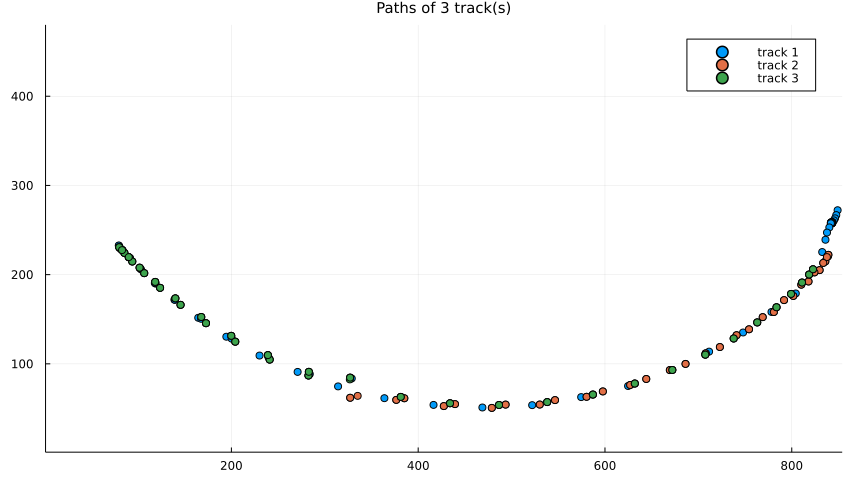

In [41]:
plt = plot(title = "Paths of $(length(tracks_70cm1)) track(s)", titlefont = 10,
    xlims = (1,854), ylims = (1, 480),
    size = (854, 480), aspect = :equal, legend=:topright)
for (n, tr) in enumerate(tracks_70cm1)
    scatter!(plt, getfield.(tr.path, :x), 481 .- getfield.(tr.path, :y), label="track $n")
end
display(plt)

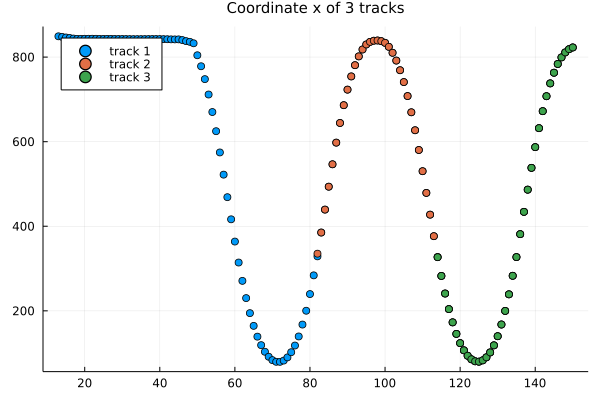

In [42]:
plt = plot(title = "Coordinate x of $(length(tracks_70cm1)) tracks", titlefont = 10, legend=:topleft)
for (n, tr) in enumerate(tracks_70cm1)
    scatter!(plt, tr.nspan, getfield.(tr.path, :x), label="track $n")
end
display(plt)

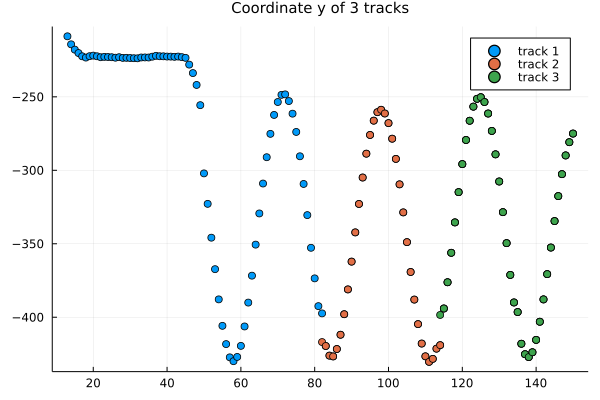

In [43]:
plt = plot(title = "Coordinate y of $(length(tracks_70cm1)) tracks", titlefont = 10, legend=:topright)
for (n, tr) in enumerate(tracks_70cm1)
    scatter!(plt, tr.nspan, - getfield.(tr.path, :y), label="track $n")
end
display(plt)

In [44]:
size(vd[1])

(480, 854)

In [45]:
data_x = getfield.(tracks_70cm1[1].path, :x)
data_y = size(vd[1], 1) + 1 .- getfield.(tracks_70cm1[1].path, :y)
nothing

In [46]:
n_minima = Int[]
for j in 40:length(data_x)-1
    if data_x[j-1] > data_x[j] < data_x[j+1]
        push!(n_minima, j + first(tracks_70cm1[1].nspan) - 1)
    end
end
n_minima

2-element Vector{Int64}:
  72
 125

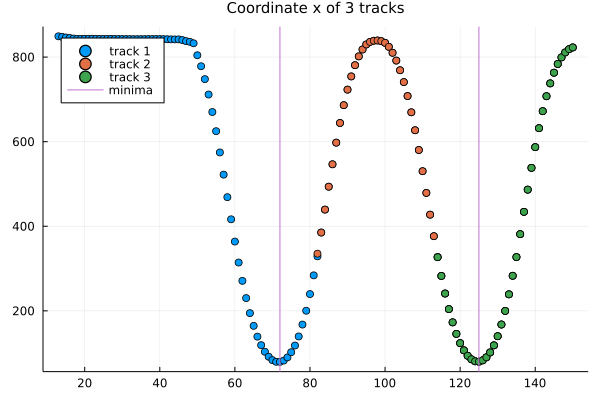

In [47]:
plt = plot(title = "Coordinate x of $(length(tracks_70cm1)) tracks", titlefont = 10, legend=:topleft)
for (n, tr) in enumerate(tracks_70cm1)
    scatter!(plt, tr.nspan, getfield.(tr.path, :x), label="track $n")
end
vline!(plt, n_minima, label = "minima")
display(plt)

In [48]:
(n_minima[2:end] - n_minima[1:end-1]) / 29.5

1-element Vector{Float64}:
 1.7966101694915255

In [49]:
g = 9.8 # m/s
l = 0.7 # m
T_p = 2π * √(l / g)

1.679251908362714

In [50]:
function medias(a::Real, b::Real)
    (a ≥ 0 && b ≥ 0) || throw(ArgumentError("arguments must be nonnegative"))
    ma = (a + b)/2
    mg = sqrt(a * b)
    return ma, mg
end

function agm(a::Real, b::Real; tol::Real = 1e-10, maxiter::Int = 100)
    tol > 0 || throw(ArgumentError("tolerance must be positive"))
    maxiter > 0 || throw(ArgumentError("maximum number of iterations must be positive"))
    y1, y2 = a, b
    n = 0
    while abs(y1 - y2) > tol && n < maxiter
        y1, y2 = medias(y1, y2)
        n += 1
    end
    return (y1 + y2)/2, abs(y1 - y2), n
end

agm (generic function with 1 method)

In [51]:
θ₀ = π / 4
T_p / agm(1, cos(θ₀ / 2))[1]

1.7463772212095845

### Escala

* Vamos fazer ajustar um circunferência ao movimento do pêndulo, para descobrir a escala espacial.

In [52]:
error(u) = sum(
    abs2,
    (data_x[50:end] .- u[1]).^2 + (data_y[50:end] .- u[2]).^2 .- u[3]^2
    ) / length(data_x)

error (generic function with 1 method)

In [53]:
center_point = Optim.optimize(error, [400.0, 800.0, 500])

 * Status: success

 * Candidate solution
    Final objective value:     4.747098e+06

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    152
    f(x) calls:    285


In [54]:
Optim.minimum(center_point)

4.747098303560445e6

In [55]:
center_nx, center_ny, radius_n = Optim.minimizer(center_point)

3-element Vector{Float64}:
 466.4527734375073
 556.931098992254
 504.6867125754256

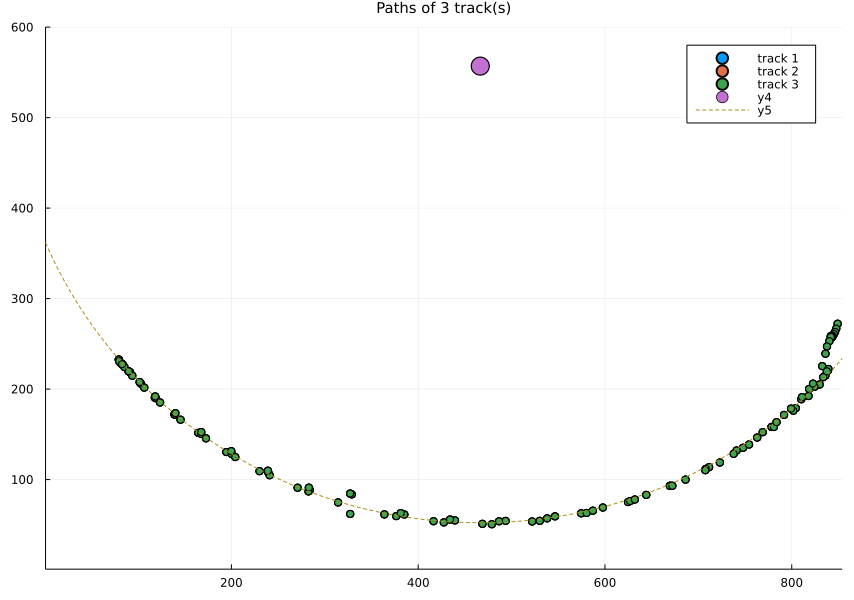

In [56]:
plt = plot(title = "Paths of $(length(tracks_70cm1)) track(s)", titlefont = 10,
    xlims = (1,854), ylims = (1, 600),
    size = (854, 600), aspect = :equal, legend=:topright)
for (n, tr) in enumerate(tracks_70cm1)
    scatter!(plt, data_x, data_y, label="track $n")
end
scatter!(plt, (center_nx, center_ny), markersize = 10)
plot!(plt, 1:854, nx -> center_ny - √(radius_n^2 - (nx - center_nx)^2), linestyle = :dash)
display(plt)

In [57]:
scale = radius_n / l # points per meter

720.9810179648938

In [58]:
data_scaled_x = (data_x .- center_nx) / scale
data_scaled_y = (data_y .- center_ny) / scale

138-element Vector{Float64}:
 -0.394914656131751
 -0.40248184349240446
 -0.40748882998603525
 -0.41070501633564466
 -0.4137859505375474
 -0.41498883520263746
 -0.41368762940013887
 -0.41314247815726374
 -0.4137538004075838
 -0.41465783585407734
 -0.4143215814296561
 -0.41445918939467374
 -0.41465167173515316
  ⋮
 -0.6932075486483301
 -0.6814975162041922
 -0.6643567206953268
 -0.6432782366403766
 -0.6194322055950364
 -0.5943266061958571
 -0.5693437499422699
 -0.5457688570263158
 -0.5250531929426347
 -0.5073704471030618
 -0.49486783473829205
 -0.4867289227804346

In [59]:
function dudt_pendulum!(du, u, p, t)
    θ, ω = u
    l, g, α = p
    du[1] = ω
    du[2] = - (g / l) * sin(θ) - α * ω
end

dudt_pendulum! (generic function with 1 method)

In [60]:
g = 9.8 # 9,8 m/s^2
l = 0.7 # 70 cm
α = 0
p = [l, g, α]
θ₀ = π/6
ω₀ = 0.0
u₀ = [θ₀, ω₀]
tspan = (0.0, 5.0) # até 5 segundos
prob_pendulum = ODEProblem(dudt_pendulum!, u₀, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 5.0)
u0: 2-element Vector{Float64}:
 0.5235987755982988
 0.0

In [61]:
sol = solve(prob_pendulum, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 32-element Vector{Float64}:
 0.0
 0.00014258482589892232
 0.0015684330848881453
 0.015826915674780374
 0.05520287578278107
 0.1186994834079412
 0.20021318382712075
 0.3059148580456768
 0.4289016257510082
 0.556918677400161
 0.7013506618956613
 0.8726975126106766
 1.0408496814092747
 ⋮
 2.6895148352802134
 2.889058164364068
 3.131254096880385
 3.336085982741865
 3.5798111245515645
 3.789943545334064
 4.033677951692835
 4.248777445772274
 4.4897245954065665
 4.712943195270591
 4.948794481749135
 5.0
u: 32-element Vector{Vector{Float64}}:
 [0.5235987755982988, 0.0]
 [0.5235987044417862, -0.000998093740288535]
 [0.5235901656815024, -0.01097897701799843]
 [0.52272227807514, -0.1107323314966049]
 [0.5129658631370241, -0.3840406425996626]
 [0.4749871723737738, -0.8072478724104671]
 [0.38897468427160925, -1.2882714483013225]
 [0.22681172050256487, -1.7418841189469372]
 [-0.0034489023047863383, -1.936781391381158]
 [-

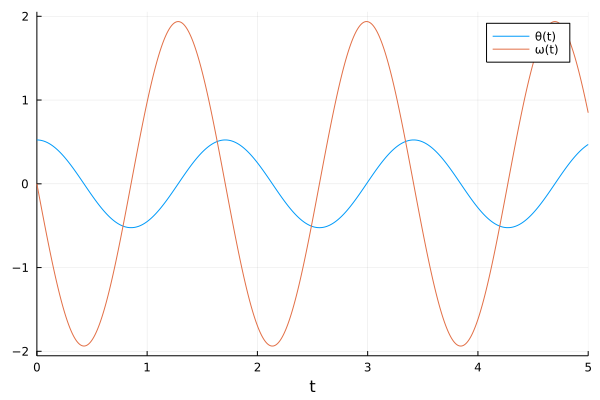

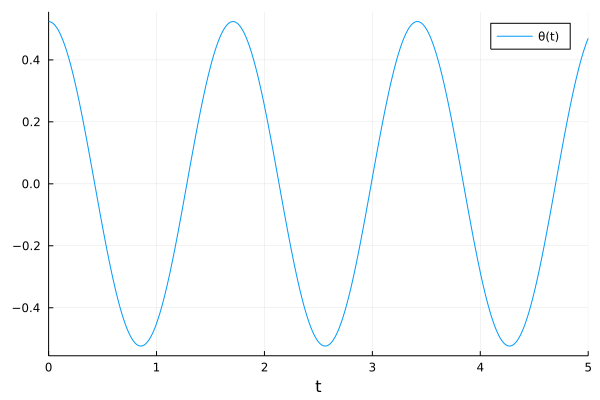

In [62]:
display(plot(sol, label = ["θ(t)" "ω(t)"]))
display(plot(sol, vars = 1, label = "θ(t)"))

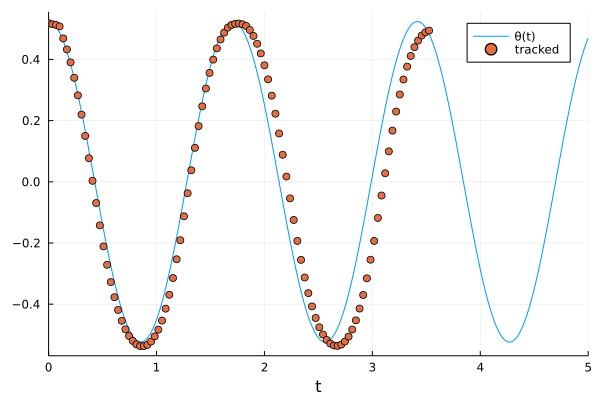

In [63]:
n0 = 34
plt = plot(sol, vars = 1, label = "θ(t)")
scatter!(plt, (0:length(data_x)-n0) ./ 29.5, data_scaled_x[n0:end], label="tracked")
display(plt)

In [64]:
df = CSV.read("../../../_assets/attachments/data/pendulo_70cm_reduzido.csv", DataFrame)

481×3 DataFrame
 Row │ nf     nx       ny      
     │ Int64  Float64  Float64 
─────┼─────────────────────────
   1 │    13  848.727  209.073
   2 │    14  847.362  212.843
   3 │    15  846.127  216.006
   4 │    16  844.89   218.281
   5 │    17  843.577  220.369
   6 │    18  842.701  221.178
   7 │    19  842.682  220.634
   8 │    20  842.833  220.468
   9 │    21  842.866  220.873
  10 │    22  843.008  221.232
  11 │    23  842.875  221.118
  ⋮  │   ⋮       ⋮        ⋮
 472 │   484  329.935  399.157
 473 │   485  296.256  383.914
 474 │   486  264.634  366.558
 475 │   487  236.224  348.115
 476 │   488  211.528  329.685
 477 │   489  190.97   312.452
 478 │   490  174.485  297.065
 479 │   491  162.013  283.93
 480 │   492  154.255  274.632
 481 │   493  150.403  268.847
               460 rows omitted

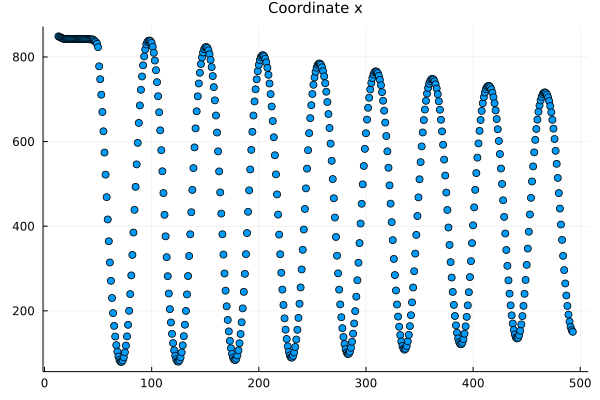

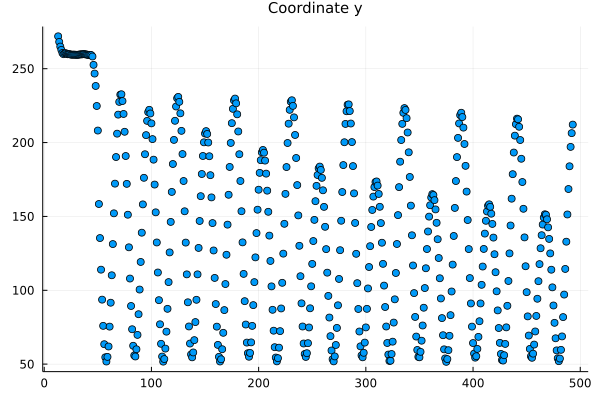

In [65]:
plt = plot(title = "Coordinate x", titlefont = 10, legend=:topleft)
scatter!(plt, df.nf, df.nx, label = nothing)
display(plt)

plt = plot(title = "Coordinate y", titlefont = 10, legend=:topleft)
scatter!(plt, df.nf, size(vd[1], 1) .+ 1 .- df.ny, label = nothing)
display(plt)

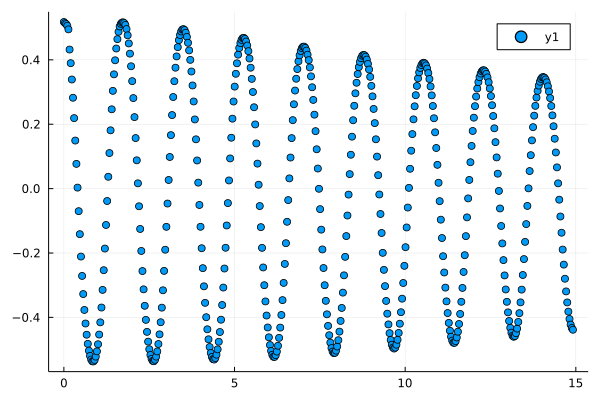

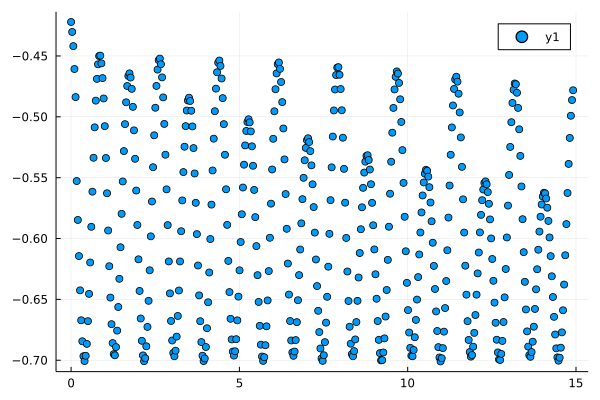

In [66]:
data2_scaled_t = (df.nf[n0:end] .- df.nf[n0]) / 29.97
data2_scaled_x = (df.nx[n0:end] .- center_nx) / scale
data2_scaled_y = (size(vd[1], 1) .+ 1 .- df.ny[n0:end] .- center_ny ) / scale
display(scatter(data2_scaled_t, data2_scaled_x))
display(scatter(data2_scaled_t, data2_scaled_y))

In [67]:
n_minima2 = Int[]
for j in 40:length(df.nx)-1
    if df.nx[j-1] > df.nx[j] < df.nx[j+1]
        push!(n_minima2, j + df.nf[1] - 1)
    end
end
n_minima2

8-element Vector{Int64}:
  72
 125
 178
 231
 283
 336
 389
 441

In [68]:
(n_minima2[2:end] - n_minima2[1:end-1])/30

7-element Vector{Float64}:
 1.7666666666666666
 1.7666666666666666
 1.7666666666666666
 1.7333333333333334
 1.7666666666666666
 1.7666666666666666
 1.7333333333333334

In [69]:
sum(n_minima2[2:end] - n_minima2[1:end-1])/7/30

1.7571428571428571

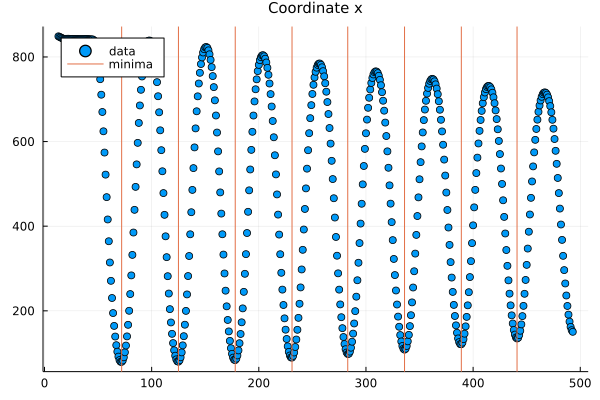

In [70]:
plt = plot(title = "Coordinate x", titlefont = 10, legend=:topleft)
scatter!(plt, df.nf, df.nx, label = "data")
vline!(plt, n_minima2, label = "minima")
display(plt)

In [71]:
g = 9.8 # 9,8 m/s^2
l = 0.7 # 70 cm
α = 0
p = [l, g, α]
θ₀ = π/6
ω₀ = 0.0
u₀ = [θ₀, ω₀]
tspan2 = (0.0, 16.45)
prob_pendulum2 = ODEProblem(dudt_pendulum!, u₀, tspan2, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 16.45)
u0: 2-element Vector{Float64}:
 0.5235987755982988
 0.0

In [72]:
VideoIO.get_duration("../../../_assets/attachments/img/pendulo_70cm_1_reduzido.mov")

16.45

In [73]:
θ₀ = π / 6
α = 0.0 #-0.1
remake(prob_pendulum2; u0 = [θ₀, 0.0], p = [l, g, α])
sol2 = solve(prob_pendulum2, Tsit5(); saveat = 1/29.87)
data2_scaled_x[1:10] .- sol2(data2_scaled_t)[1,1:10]
#length(sol[1,:])
#sol(data2_scaled_t)[1,:]
sol(data2_scaled_t)

t: 448-element Vector{Float64}:
  0.0
  0.033366700033366704
  0.06673340006673341
  0.1001001001001001
  0.13346680013346682
  0.16683350016683351
  0.2002002002002002
  0.2335669002335669
  0.26693360026693363
  0.3003003003003003
  0.33366700033366703
  0.3670337003670337
  0.4004004004004004
  ⋮
 14.547881214547882
 14.58124791458125
 14.614614614614615
 14.647981314647982
 14.68134801468135
 14.714714714714715
 14.748081414748082
 14.78144811478145
 14.814814814814815
 14.848181514848182
 14.88154821488155
 14.914914914914915
u: 448-element Vector{Vector{Float64}}:
 [0.5235987755982988, 0.0]
 [0.5197064819391027, -0.23304144136133412]
 [0.5080822001687986, -0.4629302691579846]
 [0.4888836986777478, -0.6865155884298499]
 [0.4623737395236549, -0.9006563907399178]
 [0.4289196227578826, -1.102237149997166]
 [0.38899141026001216, -1.2882025121646734]
 [0.3431598607272609, -1.4556077279107655]
 [0.292091806799435, -1.6016605695364805]
 [0.2365413522541745, -1.7238352335086886]
 [0.17734

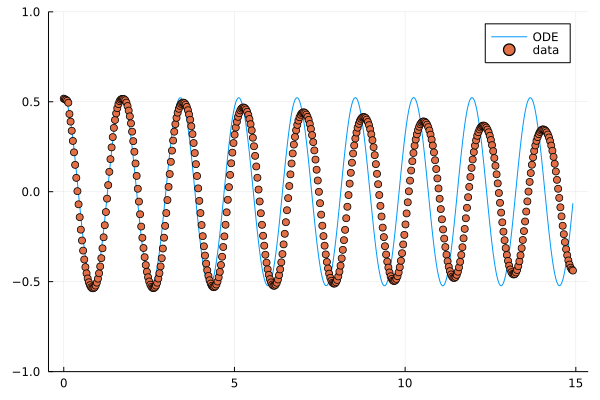

In [74]:
plot(data2_scaled_t, sol2(data2_scaled_t)[1,:], label = "ODE", ylims=(-1,1))
scatter!(data2_scaled_t, data2_scaled_x, label = "data")

In [75]:
function ddu_pendulum!(ddu, du, u, p, t)
    θ = u[1]
    ω = du[1]
    l, g, α = p
    ddu[1] = - (g / l) * sin(θ) - α * ω
end

ddu_pendulum! (generic function with 1 method)

In [76]:
θ₀ = π / 6
ω₀ = 0.0
α = 0.05
l = 0.72
p = [l, g, α]
prob_pendulum_2nd = SecondOrderODEProblem(ddu_pendulum!, [ω₀], [θ₀], tspan2, p)
sol_2nd = solve(prob_pendulum_2nd)
sol_2nd.retcode

:Success

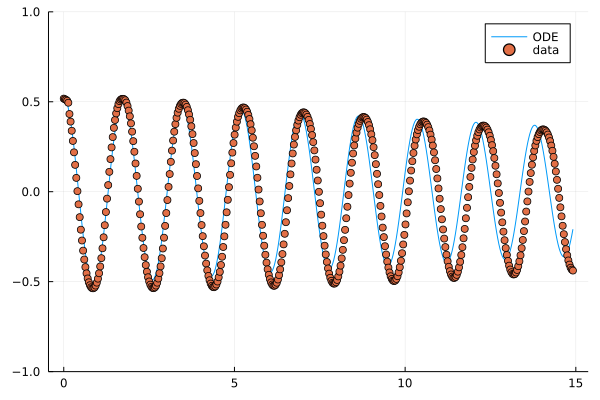

In [77]:
plot(data2_scaled_t, sol_2nd(data2_scaled_t)[2,:], label = "ODE", ylims=(-1,1))
scatter!(data2_scaled_t, data2_scaled_x, label = "data")

In [78]:
prob_rmk = remake(prob_pendulum_2nd; u0 = ArrayPartition([0.0], [θ₀]), p = [l, g, α])
sol_rmk = solve(prob_rmk)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 81-element Vector{Float64}:
  0.0
  0.00014665867806746294
  0.0016132454587420922
  0.016279113265488386
  0.05646261671975408
  0.1210661584895972
  0.20394094443174465
  0.3114428714445593
  0.4361696895237713
  0.5660126318578794
  0.7124112574090978
  0.8860654727624967
  1.0559001625088489
  ⋮
 14.05638794035794
 14.289556154453663
 14.519043487330313
 14.757103758523856
 14.975837242139237
 15.220528172168207
 15.435739323889688
 15.681990504266405
 15.899891324886354
 16.144987068343934
 16.367029004899734
 16.45
u: 81-element Vector{ArrayPartition{Float64, Tuple{Vector{Float64}, Vector{Float64}}}}:
 ([0.0], [0.5235987755982988])
 ([-0.0009980900796482302], [0.523598702408922])
 ([-0.010978532676025766], [0.5235899199226164])
 ([-0.11068567653652728], [0.5226974863498236])
 ([-0.3813143284771497], [0.5127947624143488])
 ([-0.7977890197442175], [0.4745408968992312])
 ([-1.268356249332695], [0.388301217

In [79]:
function objective(β)
    g = 9.8
    ω₀ = 0.0
    θ₀, l, α = β
    p = [l, g, α]
    tspan2 = (0.0, 16.45)
    prob = remake(prob_pendulum_2nd, u0 = ArrayPartition([0.0], [θ₀]), p = [l, g, α])
    sol = solve(prob)
    #prob = SecondOrderODEProblem(ddu_pendulum!, [ω₀], [θ₀], tspan2, p)
    #sol = solve(prob)
    return mse(data2_scaled_x, sol(data2_scaled_t)[2,:])
end

objective (generic function with 1 method)

In [80]:
res = Optim.optimize(objective, [π / 3, 0.7, 0.0])

 * Status: success

 * Candidate solution
    Final objective value:     1.323686e-03

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    71
    f(x) calls:    135


In [81]:
θ₀, l, α = Optim.minimizer(res)

3-element Vector{Float64}:
 0.5566387971294271
 0.7420963830767683
 0.03745649548388733

In [82]:
π / θ₀

5.6438621773956665

In [83]:
θ₀ - π / 5.6529

0.0008899507691884079

In [84]:
prob_rmk = remake(prob_pendulum_2nd, u0 = ArrayPartition([0.0], [θ₀]), p = [l, g, α])

ODEProblem with uType ArrayPartition{Float64, Tuple{Vector{Float64}, Vector{Float64}}} and tType Float64. In-place: true
timespan: (0.0, 16.45)
u0: ([0.0], [0.5566387971294271])

In [85]:
sol_2nd = solve(prob_rmk)
sol_2nd.retcode

:Success

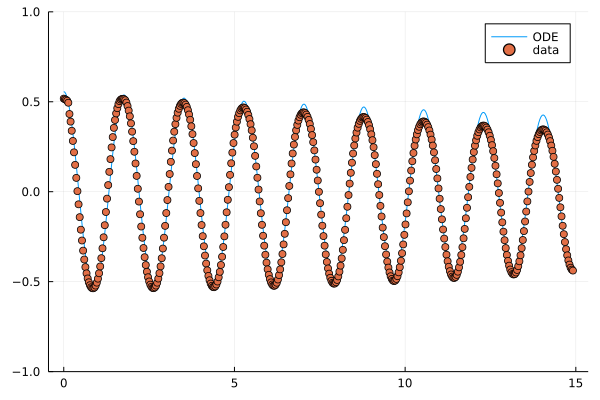

In [86]:
plot(data2_scaled_t, sol_2nd(data2_scaled_t)[2,:], label = "ODE", ylims=(-1,1))
scatter!(data2_scaled_t, data2_scaled_x, label = "data")